<a href="https://colab.research.google.com/github/bigbrotherchen/R_homework0927/blob/master/keras%2BCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
(xtrain,ytrain),\
(xtest,ytest)=mnist.load_data()

In [0]:
x_train=xtrain.reshape(xtrain.shape[0],28,28,1).astype('float32')
x_test=xtest.reshape(xtest.shape[0],28,28,1).astype('float32')

In [0]:
x_train_normal=x_train/255
x_test_normal=x_test/255

In [0]:
y_train=np_utils.to_categorical(ytrain)
y_test=np_utils.to_categorical(ytest)

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [0]:
model=Sequential()

In [0]:
model.add(Conv2D(filters=16,
         kernel_size=(5,5),
         padding='same',
         input_shape=(28,28,1),
         activation='relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(filters=36,
         kernel_size=(5,5),
         padding='same',
         activation='relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Dropout(0.25))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(units=128,activation='relu'))

In [0]:
model.add(Dense(units=10,activation='softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
training=model.fit(x=x_train_normal,
                  y=y_train,validation_split=0.2,
                  epochs=10,batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 34s - loss: 0.3697 - acc: 0.8890 - val_loss: 0.1011 - val_acc: 0.9699
Epoch 2/10
 - 34s - loss: 0.0922 - acc: 0.9720 - val_loss: 0.0675 - val_acc: 0.9798
Epoch 3/10
 - 34s - loss: 0.0661 - acc: 0.9792 - val_loss: 0.0530 - val_acc: 0.9843
Epoch 4/10
 - 34s - loss: 0.0517 - acc: 0.9840 - val_loss: 0.0442 - val_acc: 0.9866
Epoch 5/10
 - 34s - loss: 0.0424 - acc: 0.9866 - val_loss: 0.0431 - val_acc: 0.9878
Epoch 6/10
 - 34s - loss: 0.0374 - acc: 0.9883 - val_loss: 0.0413 - val_acc: 0.9886
Epoch 7/10
 - 34s - loss: 0.0323 - acc: 0.9898 - val_loss: 0.0367 - val_acc: 0.9901
Epoch 8/10
 - 34s - loss: 0.0272 - acc: 0.9911 - val_loss: 0.0351 - val_acc: 0.9898
Epoch 9/10
 - 34s - loss: 0.0253 - acc: 0.9917 - val_loss: 0.0320 - val_acc: 0.9905
Epoch 10/10
 - 34s - loss: 0.0226 - acc: 0.9925 - val_loss: 0.0292 - val_acc: 0.9927


In [0]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig=plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image,cmap='binary')
    plt.show()

In [0]:
def plot_image_label_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title='label='+str(labels[idx])
        if len(prediction)>0:
            title+=',predict='+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
    plt.show()    

In [0]:
def show_training(training,train,validation):
    plt.plot(training.history[train])
    plt.plot(training.history[validation])
    plt.title('training process')
    plt.ylabel('training measure')
    plt.xlabel('Epoch')
    plt.legend(['training','validation'],loc='upper left')
    plt.show()

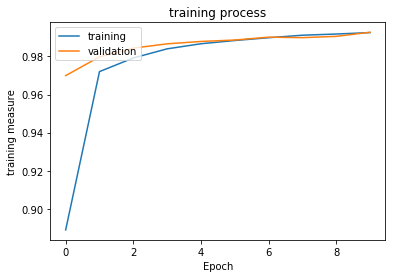

In [0]:
show_training(training,'acc','val_acc')

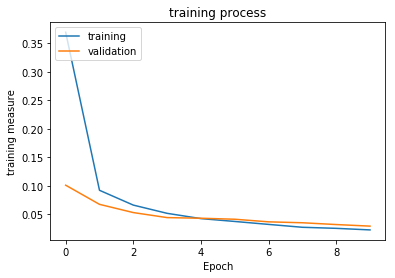

In [0]:
show_training(training,'loss','val_loss')

In [0]:
scores=model.evaluate(x_test_normal,y_test)
scores[1]

10000/10000 [==============================] - 3s 292us/step


0.99239999999999995

In [0]:
prediction=model.predict_classes(x_test_normal)

In [0]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

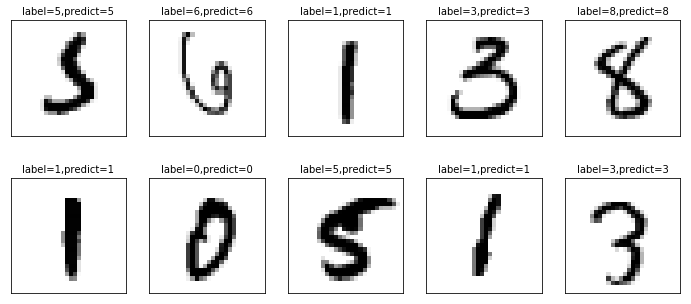

In [0]:
plot_image_label_prediction(xtest,ytest,prediction,340,10)

In [0]:
pd.crosstab(ytest,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,978,0,0,0,0,1,0,1,0,0
1,0,1132,1,1,0,0,0,1,0,0
2,0,1,1028,0,0,0,0,3,0,0
3,0,0,1,1007,0,1,0,0,1,0
4,0,0,0,0,980,0,0,0,1,1
5,1,0,0,5,0,884,1,0,0,1
6,3,2,0,1,2,1,947,0,2,0
7,0,2,7,2,0,0,0,1013,1,3
8,3,0,2,2,0,1,0,1,960,5
